In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [2]:
def visualize_prediction(confidence, first_f, last_f, no_features, name_time_column, dataframe, title, location_line, line=False):
    fig, axes = plt.subplots(2, 2, figsize=(15,15), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    for i in range(first_f,last_f):
        sns.scatterplot(data=dataframe, 
                        x=name_time_column, 
                        y=columns[i], 
                        ax=ax[i-first_f], 
                        label="target", 
                        palette="Greys")
        sns.lineplot(data=dataframe, 
                     x=name_time_column, 
                     y=columns[i+no_features], 
                     ax=ax[i-first_f], 
                     label="predicted", 
                     palette="Blues")
        ax[i-first_f].fill_between(dataframe[i+no_features].values - confidence * dataframe[i+2*no_features].values, 
                              dataframe[i+no_features].values + confidence * dataframe[i+2*no_features].values, 
                              alpha=0.2, 
                              color='blue')
        if line:
            ax[i-first_f].axvline(location_line, 0,2, color="r", linestyle ="--", linewidth=1, label="train-validation")
        ax[i-first_f].set(xlabel='up time', ylabel='sensor value')
        ax[i-first_f].set(title=columns[i])
        plt.setp(ax[i-first_f].get_xticklabels(), rotation=45) 
    fig.suptitle(title)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [3]:
def smooth_data(df, rate, columns):
    new_df = pd.DataFrame(columns=["up time", "ongoing time"]+columns)
    for column in columns:
        smoothed_data = []
        for i,value in enumerate(df.loc[:,column]):
            if i==0:
                smoothed_data.append(value)
            else:
                x = rate  * value + (1 - rate) * smoothed_data[-1]
                smoothed_data.append(x)
        new_df.loc[:,column]=smoothed_data
        new_df.loc[:,"up time"] = df.loc[:,"up time"]
        new_df.loc[:,"ongoing time"] = df.loc[:,"ongoing time"]
        
    return new_df

In [4]:
def visualise_mle_prediction(dataframe, time_column, no_features, first_feature, last_feature, breakdown, line=False):
    fig, axes = plt.subplots(no_features, 1, figsize=(30,40))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe[time_column]
    for i in range(first_feature, last_feature):
        # Values for drawing lower and upper bound
        target = dataframe.iloc[:,i].values
        mu = dataframe.iloc[:,i+no_features].values
        sigma = dataframe.iloc[:,i+2*no_features].values
        lower_bound = mu - 2*sigma
        upper_bound = mu + 2* sigma
        
        # Values about appearance of anomaly 
        palette = []
        anomaly_label = dataframe.iloc[:, i+4*no_features+1].values
        if 0 in anomaly_label and 1 not in anomaly_label:
            palette = ["blue"]
        elif 1 in anomaly_label and 0 not in anomaly_label:
            palette = ["red"]
        elif 0 in anomaly_label and 1 in anomaly_label:
            palette = ["blue","red"]

        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=columns[i+no_features], 
                     ax=ax[i-first_feature], 
                     color="black")
        ax[i-first_feature].fill_between(t, lower_bound, upper_bound, color="grey", alpha=0.5)
        if line:
            ax[i-first_feature].axvline(breakdown, 0,2, color="r", linestyle ="--", linewidth=3)
        sns.scatterplot(data=dataframe, 
                        x=t, 
                        y=columns[i],
                        ax=ax[i-first_feature], 
                        hue=columns[i+4*no_features+1],
                        palette=palette
                        )   

# Visualisation of Prediction - New Machine
## Read data from csv file, which contains all metrics produced during prediction phase

In [5]:
phm_data_1 = pd.read_csv("../../files/prediction/MLE/phm_m02_1.csv", sep=";")

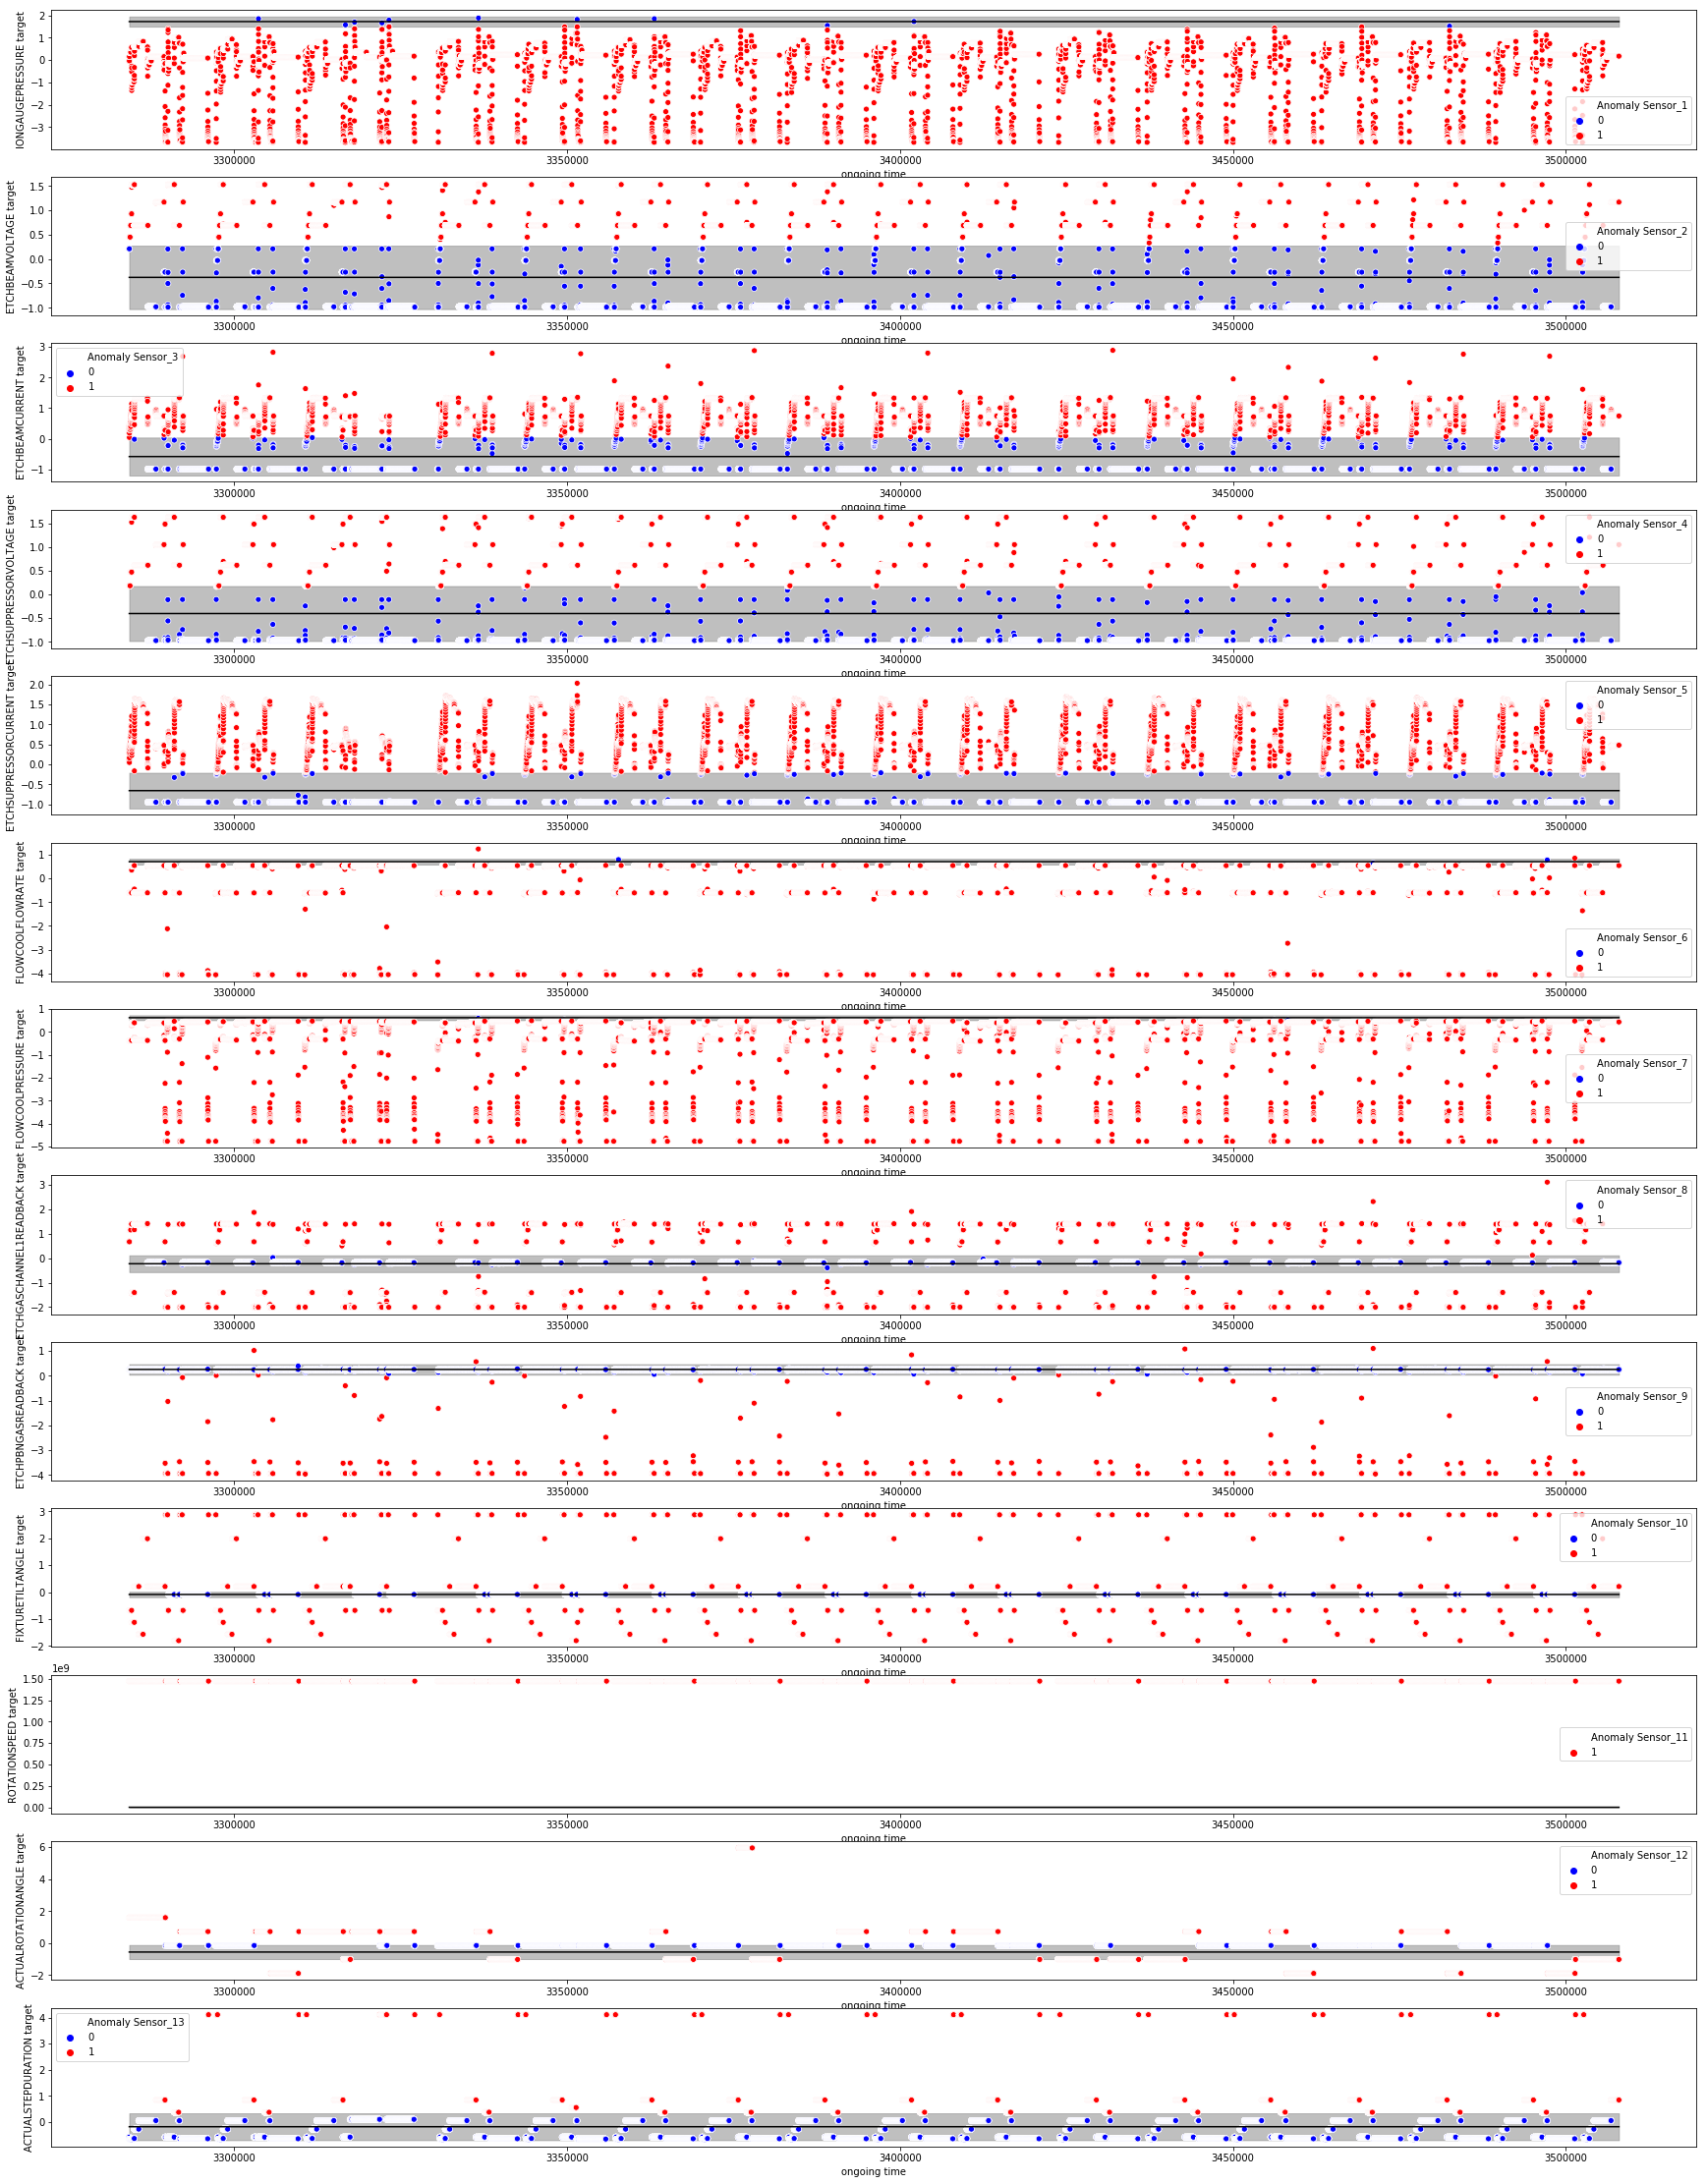

In [7]:
phm_data_11 = phm_data_1.iloc[:50000,:]
visualise_mle_prediction(dataframe = phm_data_11,
                         time_column= "ongoing time",
                         no_features=13, 
                         first_feature=1, 
                         last_feature=14,
                         breakdown=0,
                         line=False
                        )
plt.show()

## Detail view before failure occures

In [80]:
phm_data_2 = pd.read_csv("../../files/prediction/MLE/phm_2.csv", sep=";")

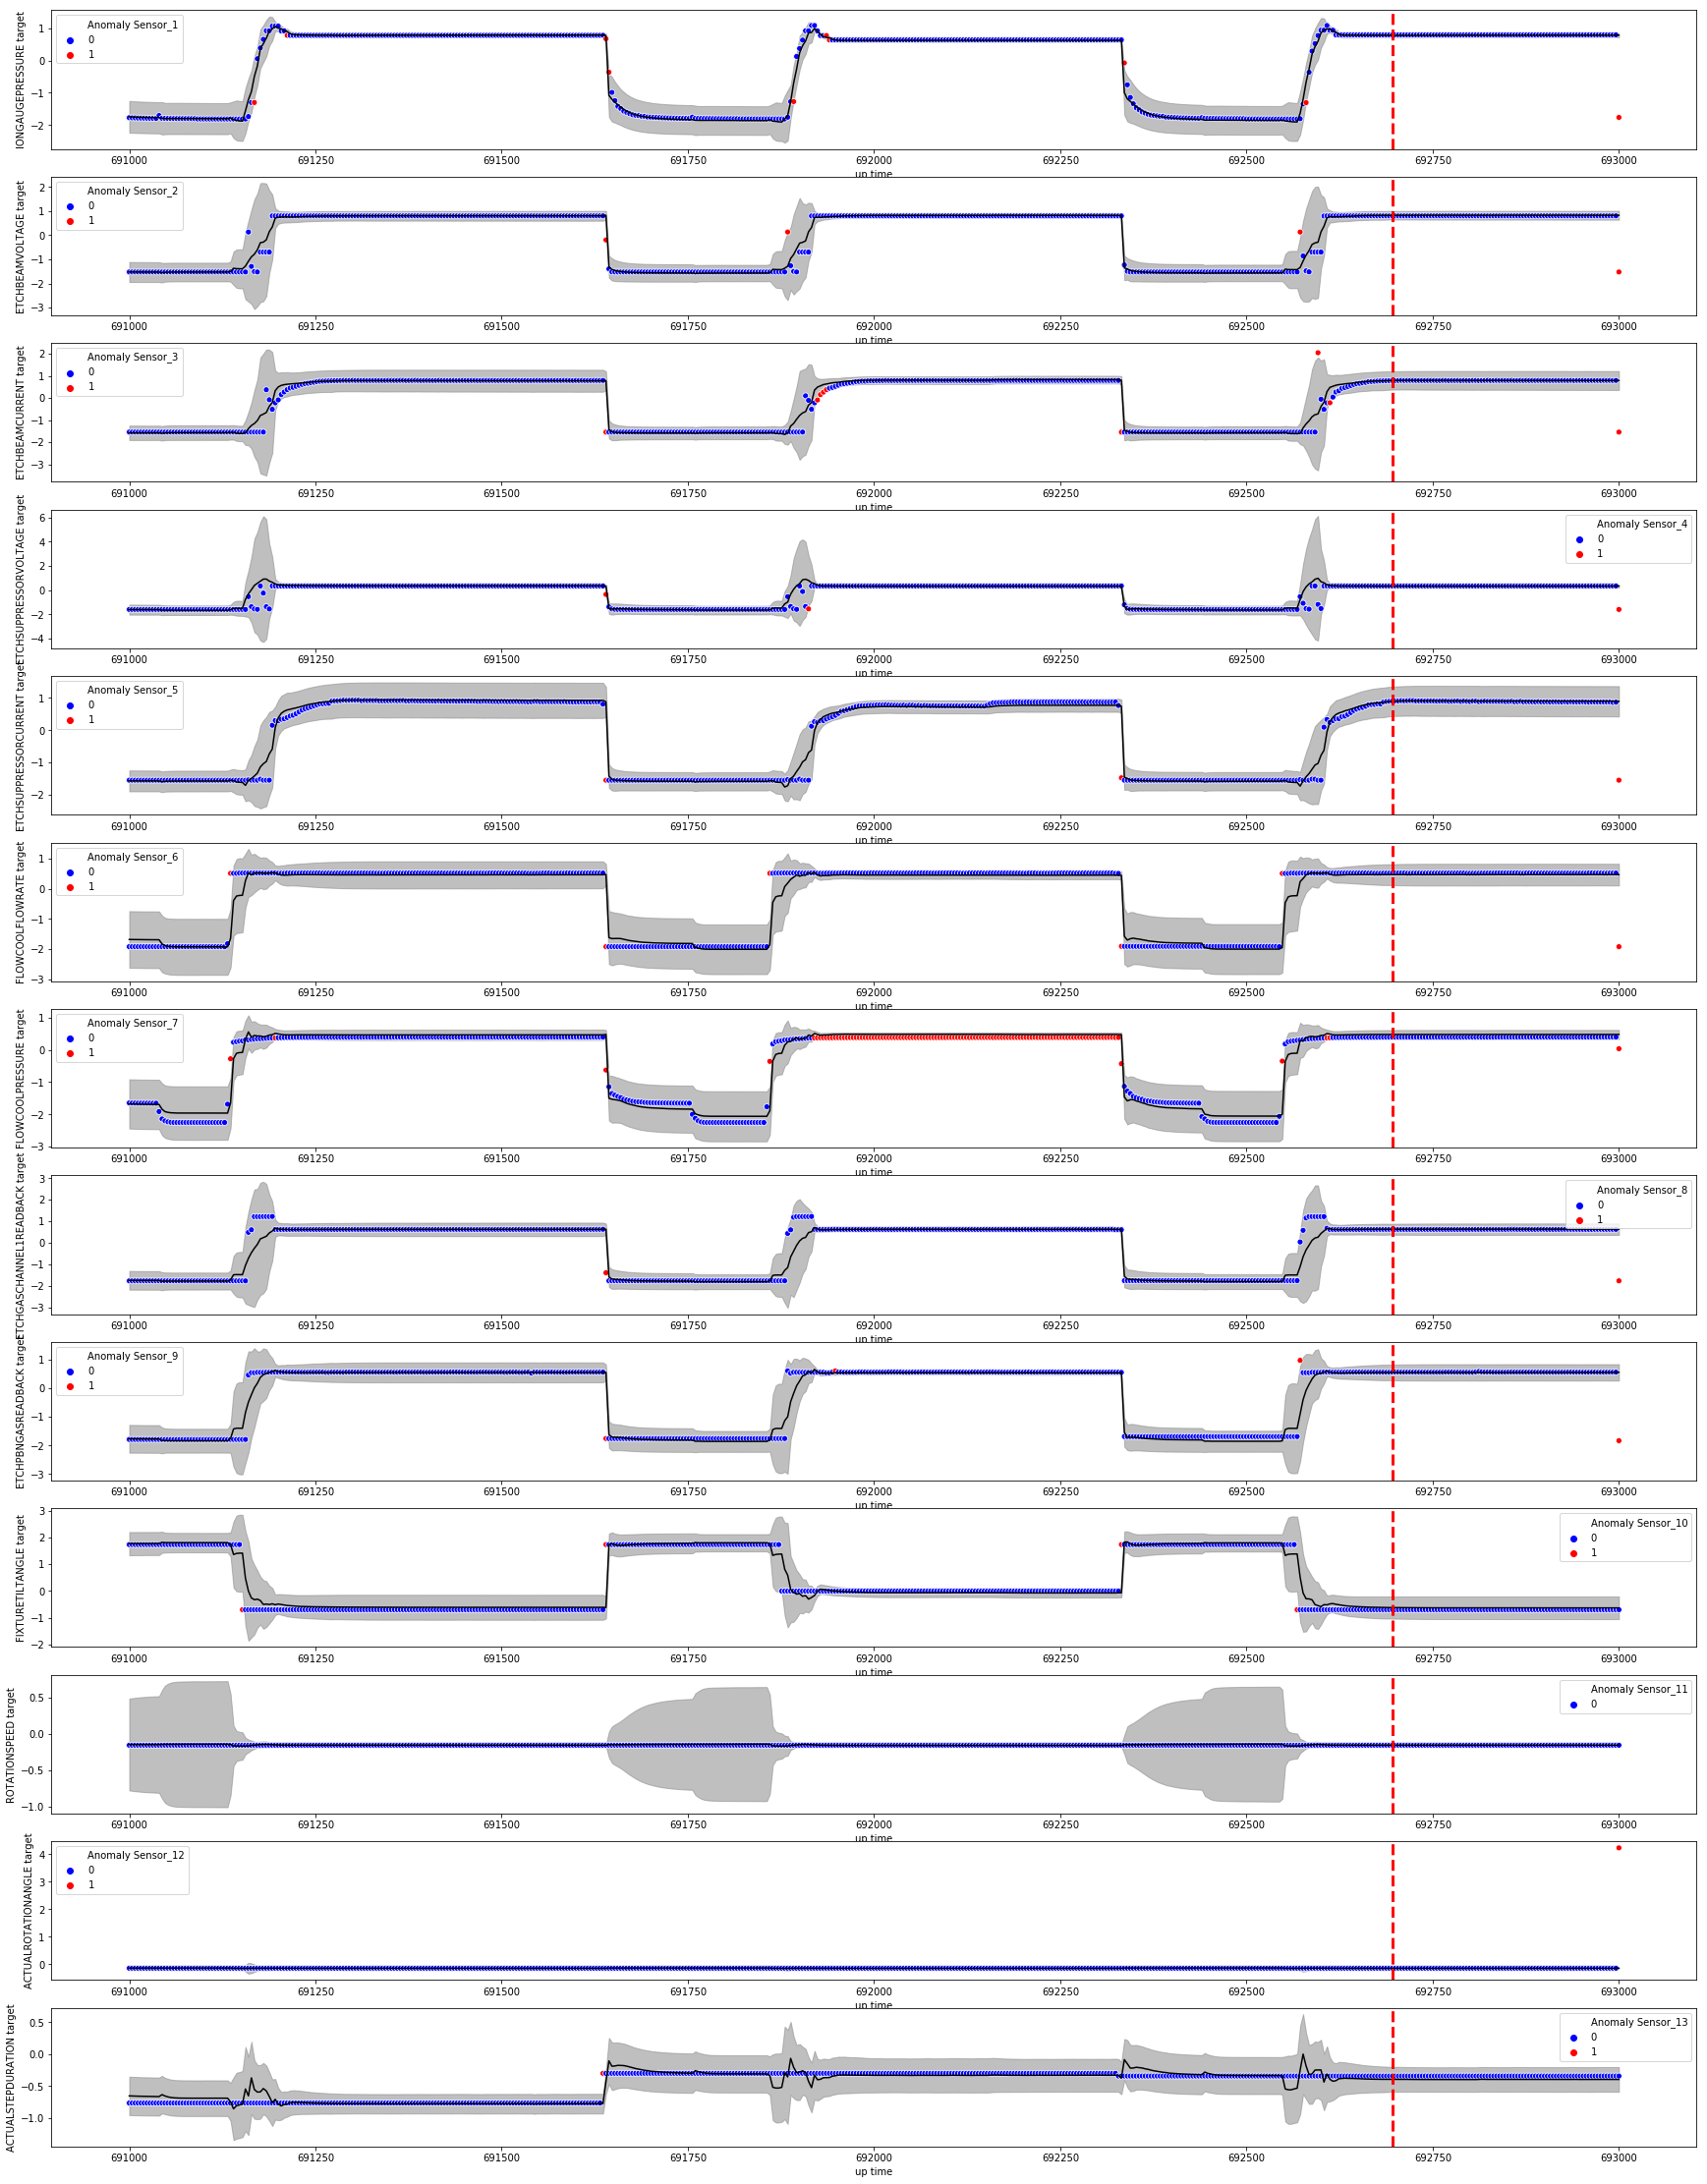

In [81]:
phm_data_22 = phm_data_2.loc[(phm_data_2["up time"]>=691000) & (phm_data_2["up time"]<=693000)]
visualise_mle_prediction(dataframe = phm_data_22,
                         time_column= "up time", 
                         no_features=13, 
                         first_feature=1, 
                         last_feature=14,
                         breakdown=692696,
                         line=True
                        )
plt.show()

In [95]:
phm_data_4 = pd.read_csv("../../files/prediction/MLE/phm_4.csv", sep=";")

,ID,IONGAUGEPRESSURE target,ETCHBEAMVOLTAGE target,ETCHBEAMCURRENT target,ETCHSUPPRESSORVOLTAGE target,ETCHSUPPRESSORCURRENT target,FLOWCOOLFLOWRATE target,FLOWCOOLPRESSURE target,ETCHGASCHANNEL1READBACK target,ETCHPBNGASREADBACK target,...,Lot,runnum,recipe,recipe_step,up time,ongoing time,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,FIXTURESHUTTERPOSITION
86293,386394.0,0.680102,0.802837,0.556157,0.340141,0.595476,0.525214,0.400549,0.623232,0.559865,...,1447,10851963,1,1.0,1545572,8697342,-0.703252,0.916422,-0.115588,0.0
86294,386395.0,0.680102,0.803312,0.603653,0.340476,0.651330,0.521334,0.403294,0.623232,0.559865,...,1447,10851963,1,1.0,1545576,8697346,-0.703246,0.916426,-0.115580,0.0
86295,386396.0,0.680102,0.804340,0.630977,0.340423,0.688137,0.521334,0.403294,0.623232,0.559865,...,1447,10851963,1,1.0,1545580,8697350,-0.703241,0.916431,-0.115572,0.0


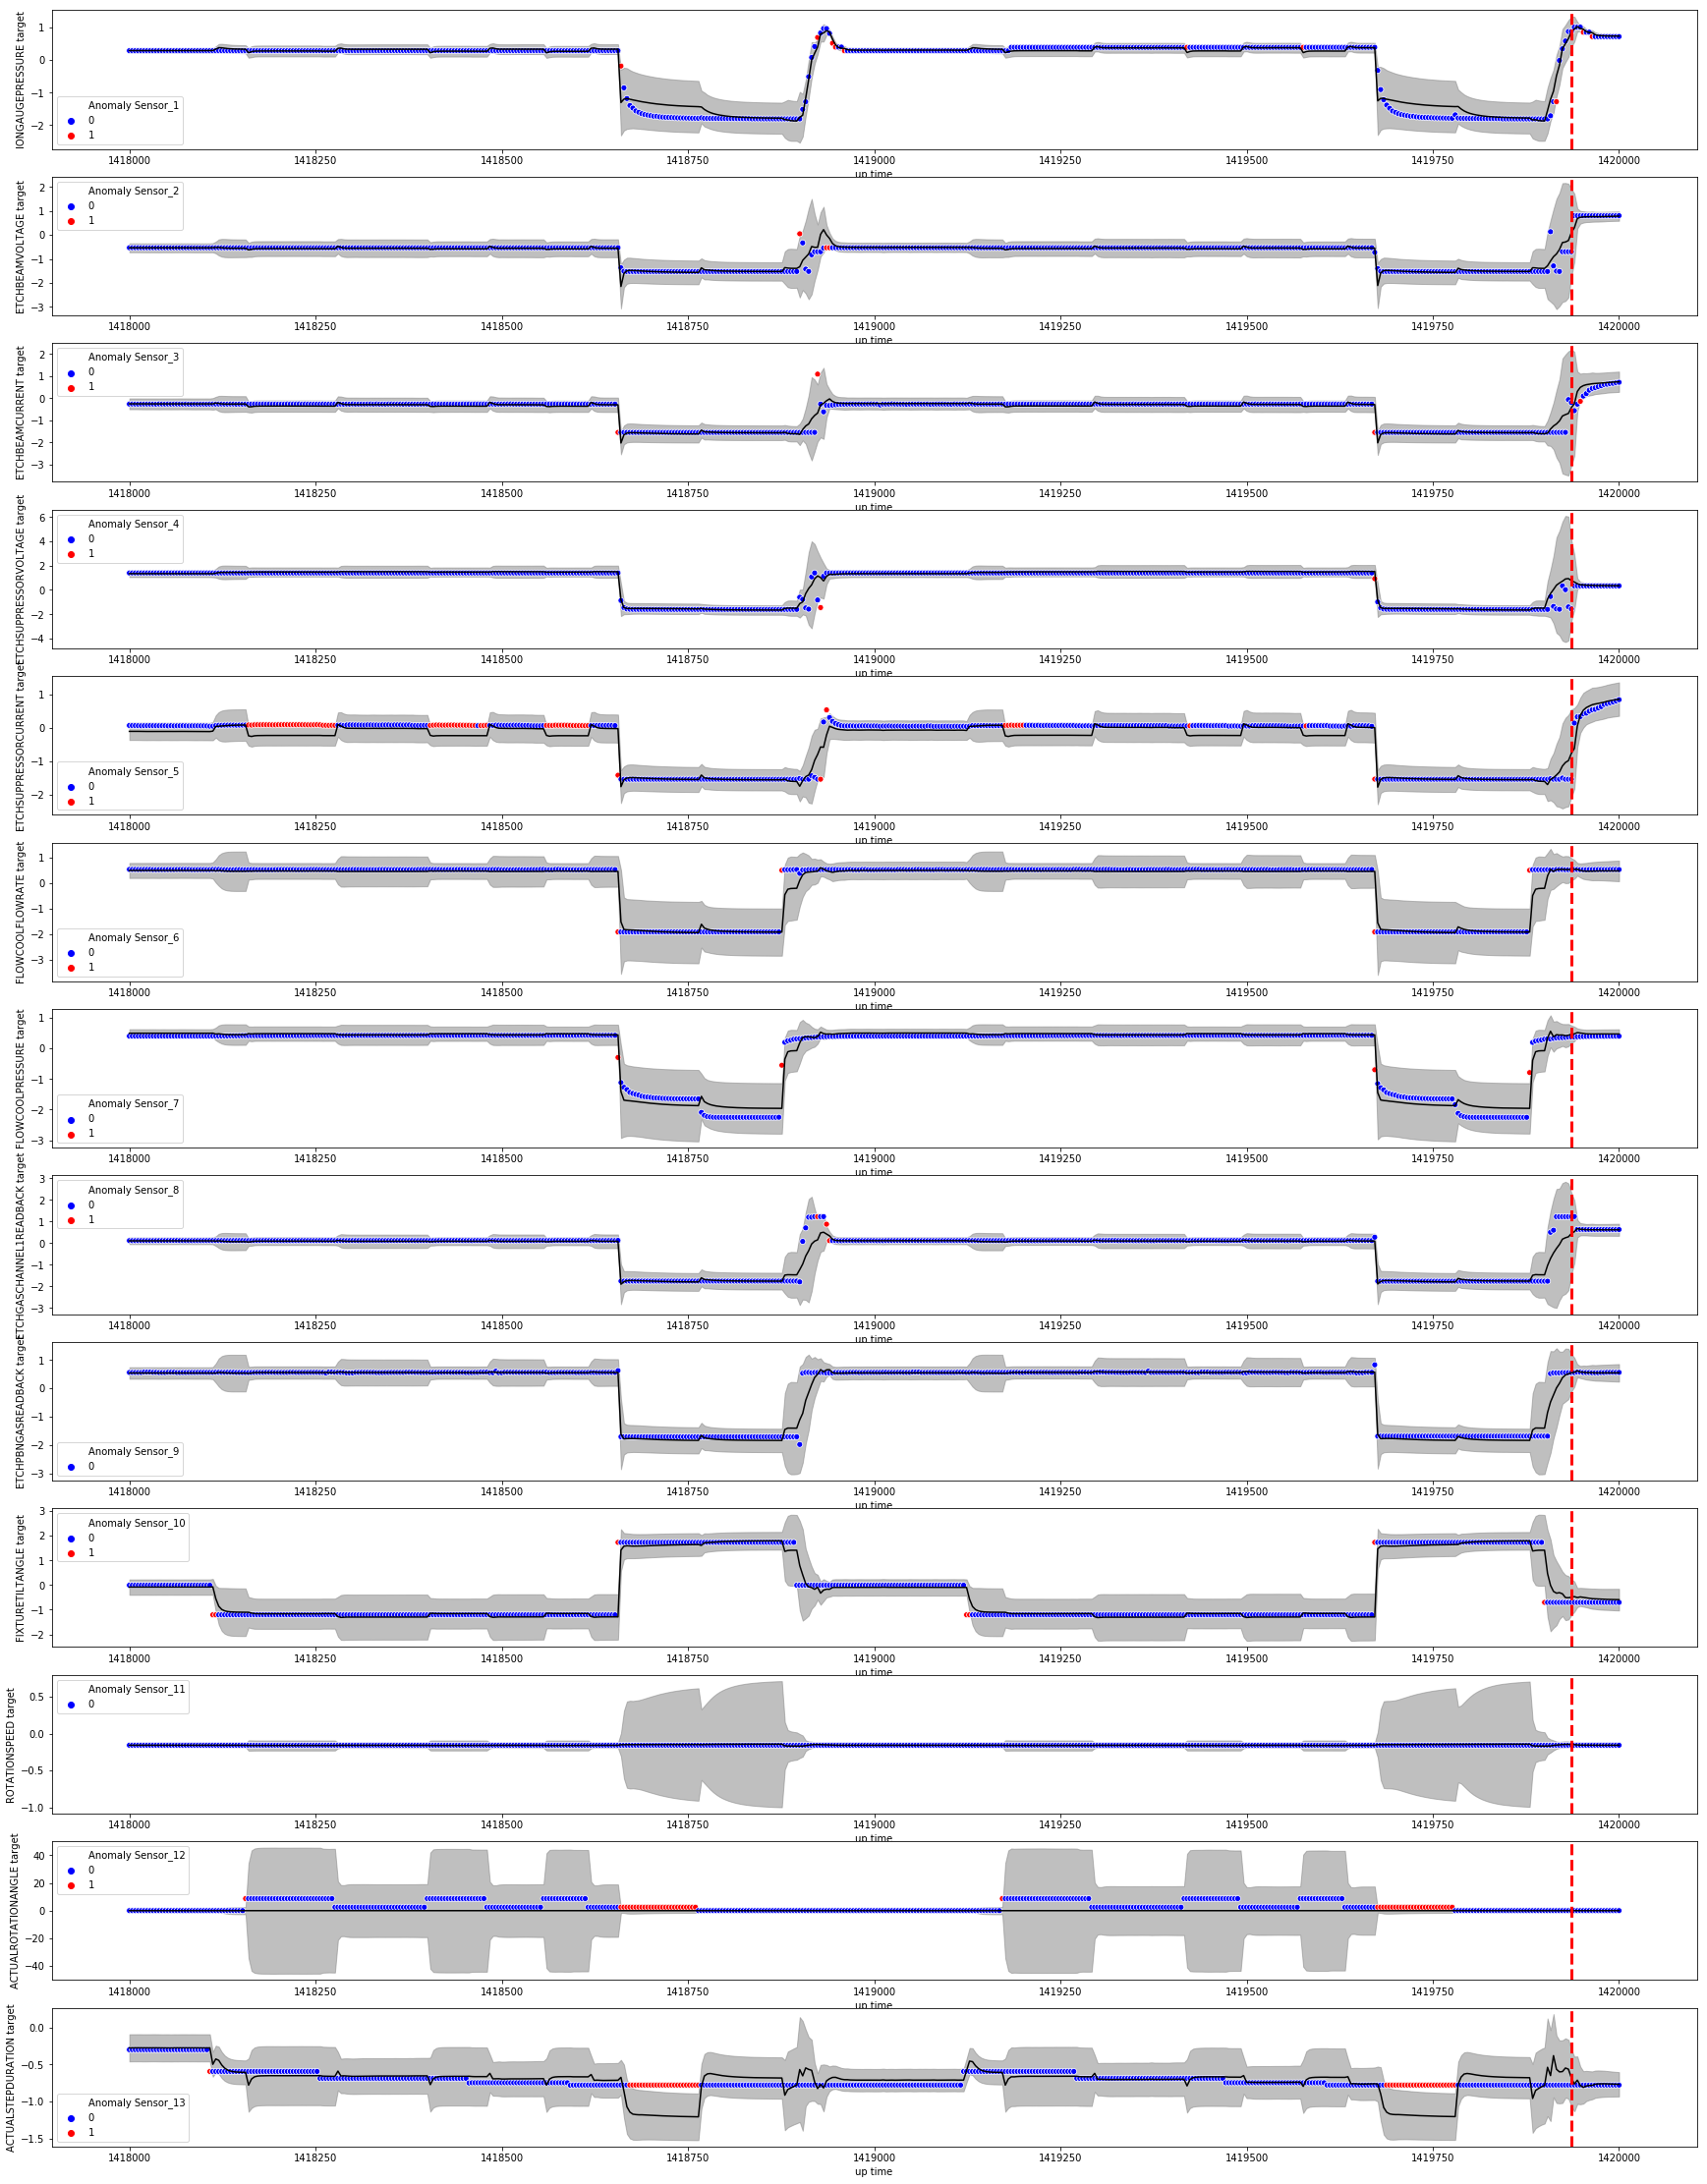

In [83]:
phm_data_41 = phm_data_4.loc[(phm_data_4["up time"]>=1418000) & (phm_data_4["up time"]<=1420000)]
visualise_mle_prediction(dataframe = phm_data_41,
                         time_column= "up time",
                         no_features=13, 
                         first_feature=1, 
                         last_feature=14,
                         breakdown=1419936,
                         line=True
                        )
plt.show()

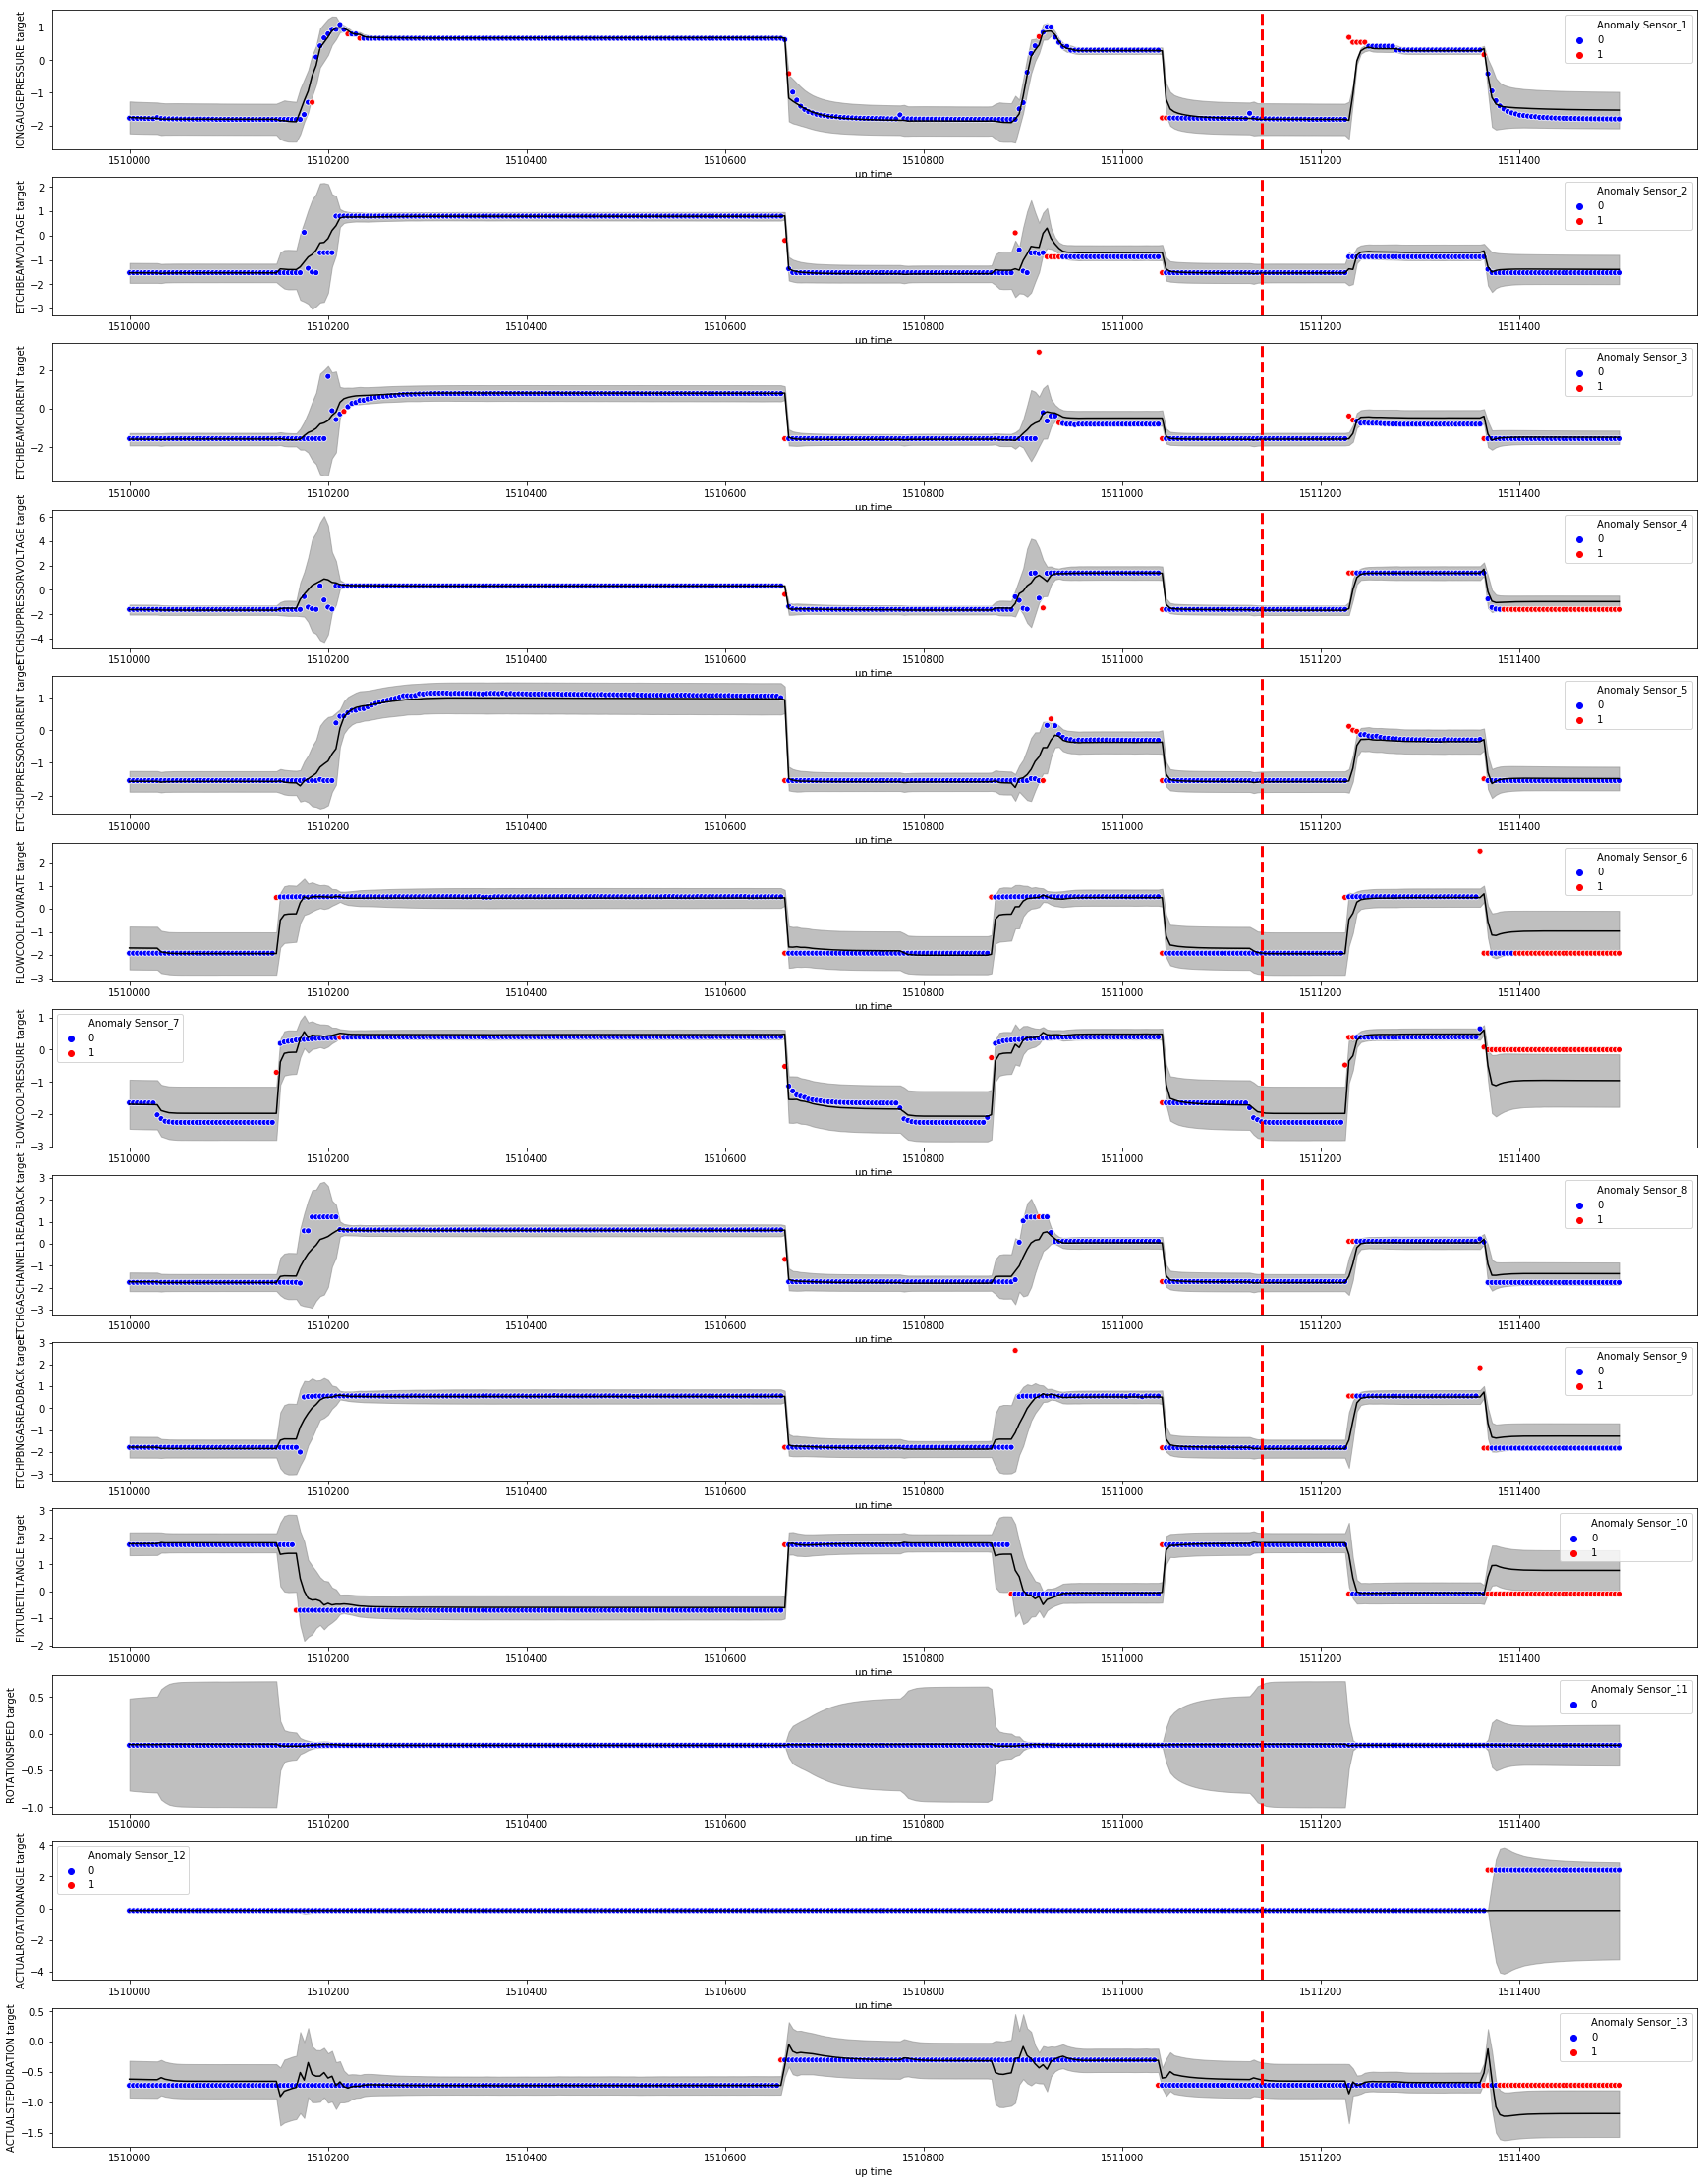

In [84]:
phm_data_42 = phm_data_4.loc[(phm_data_4["up time"]>=1510000) & (phm_data_4["up time"]<=1511500)]
visualise_mle_prediction(dataframe = phm_data_42,
                         time_column= "up time",
                         no_features=13, 
                         first_feature=1, 
                         last_feature=14,
                         breakdown=1511140,
                         line=True
                        )
plt.show()

In [123]:
phm_data_6 = pd.read_csv("../../files/prediction/MLE/phm_6.csv", sep=";")

In [125]:
phm_data_22 = phm_data_6.loc[(phm_data_6["ongoing time"]>=12828064) & (phm_data_6["ongoing time"]<=12828064
                                                                      )]
phm_data_22

,ID,IONGAUGEPRESSURE target,ETCHBEAMVOLTAGE target,ETCHBEAMCURRENT target,ETCHSUPPRESSORVOLTAGE target,ETCHSUPPRESSORCURRENT target,FLOWCOOLFLOWRATE target,FLOWCOOLPRESSURE target,ETCHGASCHANNEL1READBACK target,ETCHPBNGASREADBACK target,...,Lot,runnum,recipe,recipe_step,up time,ongoing time,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,FIXTURESHUTTERPOSITION
